In [94]:
import csv
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pickle
import datetime
import numpy as np
from cycler import cycler
import os.path
from numpy import random
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [154]:
with open('additive-all-run-list.txt', 'r') as f:
    reader = csv.reader(f)
    dlist = list(reader)

In [155]:
px = py= []
for x in dlist[1::]:
    #print(x)
    if len(x) > 0:
        px.append(int(x[1]))
        py.append(int(x[5]))

In [156]:
px.sort()
py.sort()

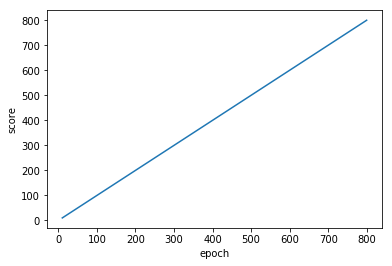

In [157]:
plt.gca().set_prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']))
plt.plot(np.array(px), np.array(py))
plt.title("")
plt.xlabel('epoch')
plt.ylabel('score')
plt.show()

In [77]:
class LossValues(object):
    def __init__(self):
        self.x = []
        self.y1 = []
        self.y2 = []
        self.mean = []

In [78]:
def plotLossWord2Vec(fname,head,size,show):
    lossVal = LossValues()
    print(fname)
    if os.path.isfile(fname) == False:
        print("file not found - %s " % fname)
        return
    lossVal = pickle.load( open( fname, "rb" ) )
    lenVal = len(lossVal.y1)
    lnt=lenVal
    if size != 0:
        lnt = size
    mn = min(np.array(lossVal.y1[0:lnt-1]))
    mx = max(np.array(lossVal.y1[0:lnt-1]))
    if show == True:
        plt.gca().set_prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']))
        plt.plot(np.array(lossVal.x[0:lnt-1]), np.array(lossVal.y1[0:lnt-1]))
        plt.plot(np.array(lossVal.x[0:lnt-1]), np.array(lossVal.y2[0:lnt-1]))
        plt.plot(np.array(lossVal.x[0:lnt-1]), np.array(lossVal.mean[0:lnt-1]))
        plt.legend(['pri', 'sec', 'mean'], loc='upper right')
        plt.title(head)
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show()
    else:
        print("%d %d %d" % (len(lossVal.x),len(lossVal.y),len(lossVal.mean)))

./additive-all-loss-values-0.001-0.2-1000-10000-750.bin


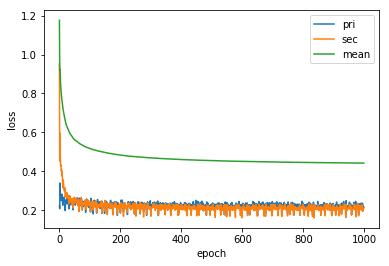

In [82]:
fname = './additive-all-loss-values-0.001-0.2-1000-10000-750.bin'
head = ''
plotLossWord2Vec(fname,head,1000,True)

In [92]:
for i in range(0,4):
    for j in range(i,4):
        print("%d %d" % (i,j))

0 0
0 1
0 2
0 3
1 1
1 2
1 3
2 2
2 3
3 3


In [129]:
x = torch.rand(1000,64)
y = torch.rand(1000,64)

In [135]:
torch.dist(x[0],y[0])

3.3831144202556898

In [115]:
x = torch.Tensor([[1,1,1,1],[1,1,1,1]])
y = torch.Tensor([[0,0,0,0],[0,0,0,0]])

In [151]:
r1 = torch.sqrt(torch.pow(torch.sum(x - y,1),2))

In [152]:
torch.min(r1)

0.0047578588128089905

In [153]:
r1


  0.0517
  0.9461
  2.1957
    ⋮    
  1.9312
  0.9215
  2.8887
[torch.FloatTensor of size 1000x1]